<a href="https://colab.research.google.com/github/Sourav7490/ma22c046_2023_PL/blob/main/Assignment-8/The_Singular_Value_Decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Defnition of SVD**

In [ ]:
from scipy.linalg import svd
import numpy as np
np.set_printoptions(precision=3, suppress=True)

In [ ]:
a = np.random.rand(4, 5) + 1j * np.random.rand(4, 5)
u, s, vh = svd(a)

In [ ]:
u @ u.T.conjugate() # u is unitary. Its columns are left singular vectors

array([[1.+0.j, 0.+0.j, 0.-0.j, 0.+0.j],
       [0.-0.j, 1.+0.j, 0.-0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.-0.j, 0.-0.j, 0.-0.j, 1.+0.j]])

In [ ]:
vh @ vh.T.conjugate() # Rows of vh are right singular vectors

array([[ 1.+0.j, -0.-0.j,  0.+0.j,  0.-0.j, -0.-0.j],
       [-0.+0.j,  1.+0.j, -0.-0.j,  0.+0.j, -0.+0.j],
       [ 0.-0.j, -0.+0.j,  1.+0.j, -0.-0.j, -0.-0.j],
       [ 0.+0.j,  0.-0.j, -0.+0.j,  1.+0.j, -0.-0.j],
       [-0.+0.j, -0.-0.j, -0.+0.j, -0.+0.j,  1.+0.j]])

In [ ]:
s # Only the diagonal entries of Sigma are returned in s

array([3.734, 1.002, 0.65 , 0.177])

**The algebra of SVD**

In [ ]:
a = np.random.rand(4, 5)
u, s, vh = svd(a)

In [ ]:
u[0, :, np.newaxis] @ vh[np.newaxis, 0, :]

array([[ 0.191,  0.129,  0.314,  0.308,  0.261],
       [ 0.17 ,  0.114,  0.278,  0.273,  0.232],
       [-0.052, -0.035, -0.086, -0.084, -0.072],
       [-0.22 , -0.147, -0.36 , -0.353, -0.3  ]])

In [ ]:
np.outer(u[0, :], vh[0, :])

array([[ 0.191,  0.129,  0.314,  0.308,  0.261],
       [ 0.17 ,  0.114,  0.278,  0.273,  0.232],
       [-0.052, -0.035, -0.086, -0.084, -0.072],
       [-0.22 , -0.147, -0.36 , -0.353, -0.3  ]])

In [ ]:
ar = np.zeros_like(a)
for i in range(4):
  ar += np.outer(u[:, i], s[i] * vh[i, :])

In [ ]:
a - ar # a and ar are identical

array([[ 0.,  0.,  0., -0.,  0.],
       [-0., -0., -0.,  0., -0.],
       [ 0., -0., -0., -0., -0.],
       [-0.,  0.,  0., -0., -0.]])

**The geometry of SVD**

In [ ]:
a = np.array([[0.1, 0.5], [0.4, 0.8]])
u, s, vh = svd(a)

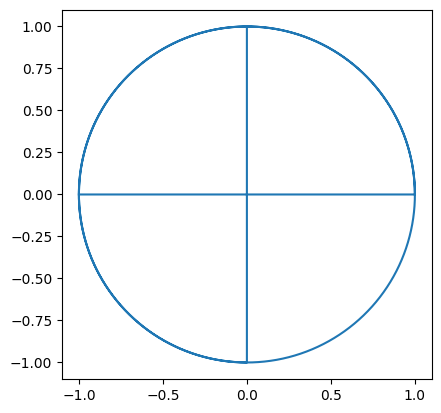

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
def show(c):
  plt.plot(c[0, :], c[1, :])
  plt.axis('image');
# plot the unit circle and axis segments:
t = np.linspace(0, 3.5 * np.pi , num=300)
l = np.linspace(-1, 1, num=10)
z = np.zeros_like(l)
c = np.array([np.concatenate([l, np.cos(t), z]),
np.concatenate([z, np.sin(t), l])])
show(c)

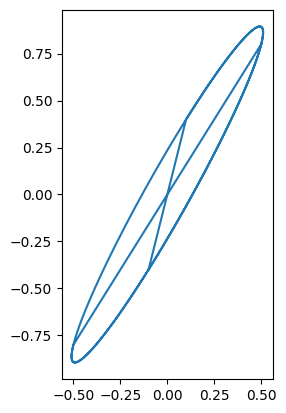

In [ ]:
show(a @ c)

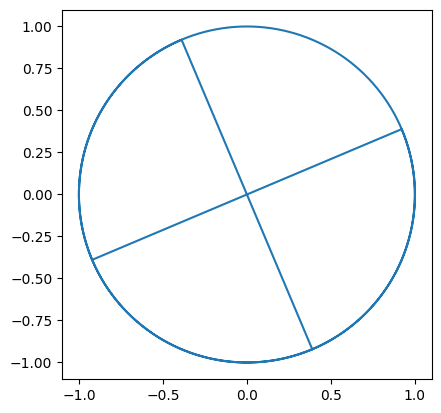

In [ ]:
show(vh @ c)

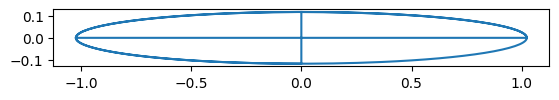

In [ ]:
show(np.diag(s) @ c)

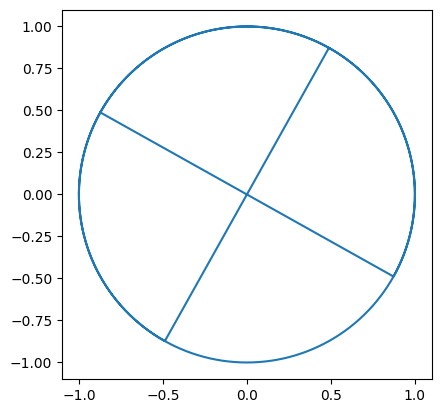

In [ ]:
show(u @ c)

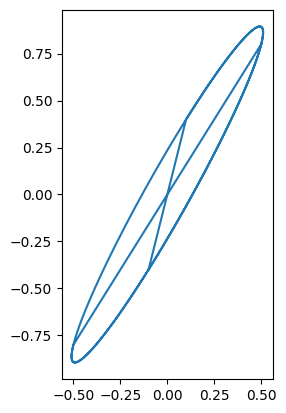

In [ ]:
show(u @ np.diag(s) @ vh @ c)

**Low rank approximation**

In [28]:
cats = plt.imread('/content/cat.png')
cats.shape

(3000, 2122, 4)

In [29]:
np.linalg.norm(cats[..., 0] - cats[..., 2], 'fro')

347.03412

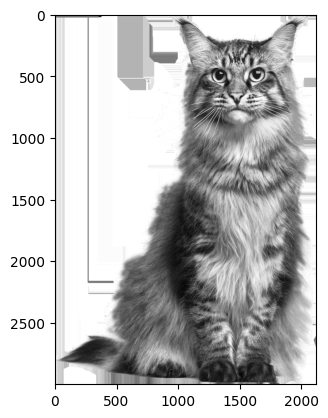

In [30]:
c = cats[..., 0]
plt.imshow(c, cmap='gray');

In [31]:
u, s, vh = svd(c)

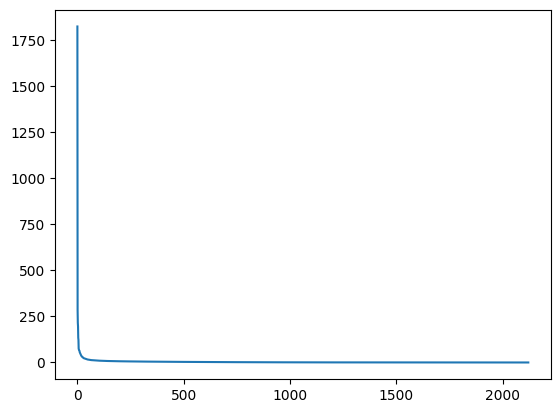

In [32]:
plt.plot(s);

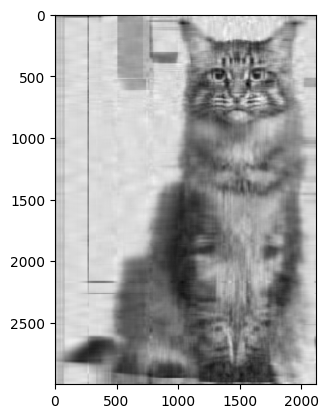

In [33]:
# Rank 20 approximation of the cats:
l = 20; cl = u[:, :l] @ np.diag(s[:l]) @ vh[:l, :]
plt.imshow(cl, cmap='gray');

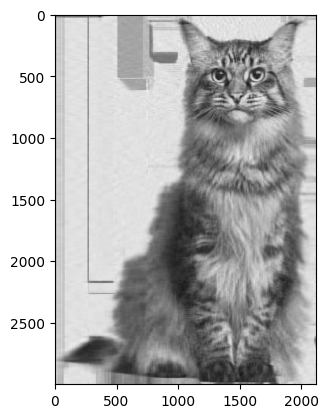

In [34]:
# Rank 50 approximation of the cats:
l = 50; cl = u[:, :l] @ np.diag(s[:l]) @ vh[:l, :]
plt.imshow(cl, cmap='gray');

In [35]:
relative_error = 1.e-1

In [36]:
s2 = s**2
total = np.sum(s2)
diff = np.sqrt((total - np.add.accumulate(s2)) / total)
l = np.argmax(diff < relative_error) + 1
l

22

In [37]:
cl = u[:, :l] @ np.diag(s[:l]) @ vh[:l, :]

In [38]:
np.linalg.norm(c - cl, 'fro') / np.linalg.norm(c, 'fro')

0.09991444

In [39]:
u.shape[0] * l + l + l * vh.shape[0]

112706

In [40]:
c.shape[0] * c.shape[1]

6366000